In [66]:
import numpy as np
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
%matplotlib 

Using matplotlib backend: MacOSX


In [67]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps = 15, bitrate=180)

In [68]:
class Universe:
    def __init__(self, x_max , y_max):
        self.x_max = x_max
        self.y_max = y_max
        self.grid = np.zeros((x_max, y_max))
        
    def add_source(self, x , y):
        unbounded_seed = [[1, 1, 1, 0, 1],
                     [1, 0, 0, 0, 0],
                     [0, 0, 0, 1, 1],
                     [0, 1, 1, 0, 1],
                     [1, 0, 1, 0, 1]]
        self.grid[ x : x+5 , y : y+5 ] = unbounded_seed
 
    def add_glider(self, x , y):
        glider_seed =\
        [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
         [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
         [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
        self.grid[ x : x+9 , y:y+36 ] = glider_seed

    def add_ship(self , x , y):
        spaceship_seed = [[0, 0, 1, 1, 0],
             [1, 1, 0, 1, 1],
             [1, 1, 1, 1, 0],
             [0, 1, 1, 0, 0]]
        self.grid[ x : x+4 , y : y+5 ] = spaceship_seed

    def clear(self):
        self.grid = np.zeros((self.x_max , self.y_max))
        

    def randomize(self):
        self.grid = np.random.randint(2, size = (self.x_max , self.y_max))
        
    def display(self):
        plt.imshow(self.grid, cmap='binary')
        plt.show()
        
    def step_forward(self):
        future = np.zeros((self.x_max , self.y_max))
        for x in range( self.x_max - 1 ):
            for y in range( self.y_max - 1 ):
                count = self.count_neighbors( x , y )
                if self.grid[x , y] == 1 and 2<= count <=3:
                    future[ x , y ] = int(1)
                elif self.grid[x , y] == 0 and count == 3:
                    future[ x , y ] = int(1)
        self.grid = future
        
    def count_neighbors(self, x , y ):
        x_range , y_range = self.get_ranges( x , y )
        if self.grid[ x , y ] == 1:
            count = -1
        else:
            count = 0
        for x in ( x_range ):
            for y in ( y_range ):
                if self.grid[ x , y ] == 1:
                    count = count + 1
        return count
    
    def get_ranges(self , x , y ):
        if x == (self.x_max-1):
            x_range = [ self.x_max-2 , self.x_max-1 , 0 ]
        if x == 0:
            x_range = [ self.x_max-1 , 0, 1 ]
        else:
            x_range = [ x-1, x , x+1 ]
        if y == self.y_max-1:
            y_range = [ self.y_max-2, self.y_max-1, 0 ]
        if y == 0:
            y_range = [ self.y_max-1 , 0, 1 ]
        else:
            y_range = [ y-1 , y , y+1 ]
        return x_range , y_range

([7, 8, 9], [7, 8, 9])

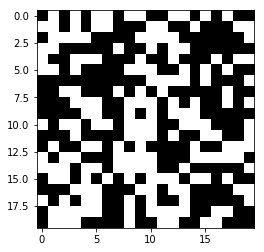

In [83]:
test=Universe(20,20)
test.randomize()
test.display()
a=test.get_ranges(8,8)
a

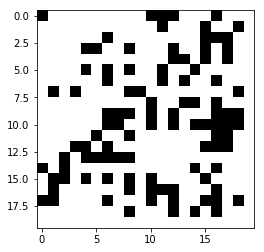

In [70]:
test.step_forward()
test.display()

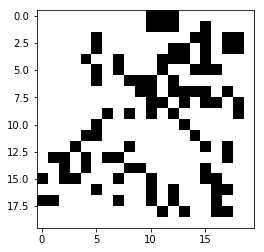

In [71]:
test.step_forward()
test.display()


In [84]:
current_universe=test

In [73]:
#def step_forward(universe):
#    y_max , x_max = universe.shape 
#    new_universe = np.zeros(( x_max , y_max ))
#    for x in range( x_max - 1 ):
#        for y in range( y_max - 1 ):
#            count = count_neighbors( universe , x , y )
#            if universe[x , y] == 1 and 2<= count <=3:
#                new_universe[ x , y ] = int(1)
#            elif universe[x , y] == 0 and count == 3:
#                new_universe[ x , y ] = int(1)
#    return new_universe

In [74]:
#def life(generations):
#    past = np.random.randint(2, size=(xmax,ymax))
#    for i in range(generations):
#        future = step_forward(past)
#        past = future
#        display(future)

In [75]:
#def generate_movie_frames(universe , generations):
#    multiverse = {}
#    past = universe
#    for i in range(generations):
#        future = step_forward(past)
#        multiverse[i] = future
#        past = future
#    return multiverse

In [76]:
def make_movie(generations):
    fig , ax = plt.subplots(figsize=(8,6))
    movie = FuncAnimation(fig, animate, frames = range(generations), interval=2000)
    movie.save('movie6.mp4', writer=writer)

In [77]:
def animate(i):
    global current_universe
    current_universe.step_forward()
    plt.imshow(current_universe.grid , cmap = 'binary')
    ax.set_title("Generation #{}".format(i), fontsize=20)

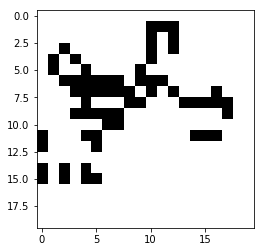

In [78]:
generations = 10
#movie_frames = generate_movie_frames(uni.grid , generations)
#fig , ax = plt.subplots(figsize=(8,6))
movie = FuncAnimation(fig, animate, frames = range(generations), interval=2000)
#blit = True , init_func = init)
movie.save('movie5.mp4', writer=writer)

In [80]:
#uni=Universe(65,65)
##uni.add_ship(25,10)
#uni.add_source(20,20)
#uni.add_glider(15,10)
#uni.add_source(40,40)
#uni.add_source(10,10)
#uni.add_ship(20,40)
#uni.add_ship(18,50)
#uni.add_source(50,10)
#uni.add_source(40,10)
#uni.add_ship(30,40)
#uni.add_ship(35,45)
#uni.add_glider(25,25)
#uni.randomize()